# CMPINF Final Project
## Team (41)2: Evan Tall, Jerry Huang, Hailey Trampel

## Introduction and how we ranked 'bestness':
Our approach to the project was to choose a neighborhood that contained aspects that  we thought were most important in a good neighborhood as well as what neighborhood contains features that make Pittsburgh unique. Our first dataset we chose was crime. We unanimously agreed on this because nobody likes crime and the less crime in a neighborhood the better. Secondly, we decided to use the public safety dataset. This data was similar to the crime data but we used the “crime per 100 persons (major crimes)” feature of this dataset. This was important because it shows which places in Pittsburgh have the most and least major crimes. The neighborhoods with the least major crimes are most desirable and therefore ranked at the top. Finally, we wanted a dataset that captured a key aspect of Pittsburgh. We chose the City of Pittsburgh bridges dataset. We chose this because we wanted a unique feature of Pittsburgh to be factored into our calculations. Since Pittsburgh has the most bridges in any city (446), it really is a city of bridges and this is a very cool aspect of Pittsburgh.
 



In [8]:
import pandas as pd
import numpy as np
import ssl

## Analyzing how safe the neighborhoods are
First, we imported the data for Pittsburgh Area arrests, as reported by the Pittsburgh Police. We then created a graph to easily compare the data.

In [22]:
pgh_crime_data = pd.read_csv("crime_data.csv")
crime_data = pgh_crime_data["INCIDENTNEIGHBORHOOD"].value_counts().sort_values(ascending=True)
crime_dict = {'Arrest Reports:': crime_data}
crime = pd.DataFrame(crime_dict)
crime.index.name = "Neighborhood"
crime.sort_index(axis = 0).head(20)

,Arrest Reports:
Neighborhood,
Allegheny Center,651
Allegheny West,75
Allentown,539
Arlington,168
Arlington Heights,100
Banksville,141
Bedford Dwellings,336
Beechview,686
Beltzhoover,313


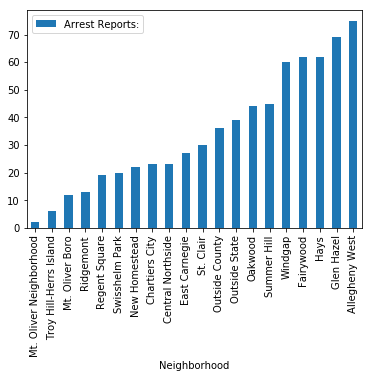

In [35]:
crime.head(20).plot.bar();

### We then brought in the Public Safety Data

In [40]:
public_safety_data = pd.read_csv('public_safety_data.csv')
safety=public_safety_data.sort_values(by = 'Part 1 Crime per 100 Persons (2010)', ascending=True)
safety_dict = safety[['Neighborhood','Part 1 Crime per 100 Persons (2010)']]
safety_df = pd.DataFrame(safety_dict)
safety_df.set_index('Neighborhood').sort_index(axis = 0).head(20)

,Part 1 Crime per 100 Persons (2010)
Neighborhood,
Allegheny Center,7.6
Allegheny West,8.2
Allentown,6.4
Arlington,2.7
Arlington Heights,7.8
Banksville,1.5
Bedford Dwellings,3.5
Beechview,2.4
Beltzhoover,4.3


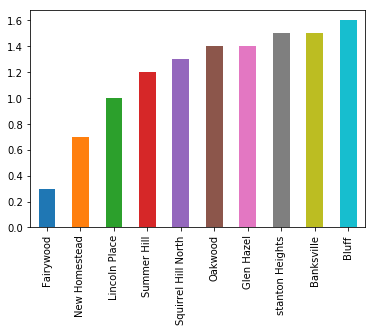

In [41]:
pd.Series([0.3,0.7,1,1.2,1.3,1.4,1.4,1.5,1.5,1.6], index=["Fairywood", "New Homestead", "Lincoln Place", "Summer Hill", "Squirrel Hill North", "Oakwood", "Glen Hazel", "stanton Heights", "Banksville", "Bluff"]).plot.bar();

### Finally we brought in the City of Pittsburgh Bridge Data

![bridgeeeee](https://media.giphy.com/media/47JYZgFVkq3oVSrvjq/giphy.gif)

In [13]:
pgh_bridge_data = pd.read_csv("bridge_data.csv")
pgh_bridge_data["neighborhood"].value_counts()
bridge_data = pgh_bridge_data["neighborhood"].value_counts()
bridge_dict = {'Number of Bridges:': bridge_data}
bridges = pd.DataFrame(bridge_dict)
bridges.index.name = "Neighborhood"
bridges.sort_index(axis = 0).head(20)

,Number of Bridges:
Neighborhood,
Allegheny Center,2
Allegheny West,3
Allentown,1
Arlington,2
Banksville,1
Beechview,1
Bloomfield,1
Bluff,2
Bon Air,3


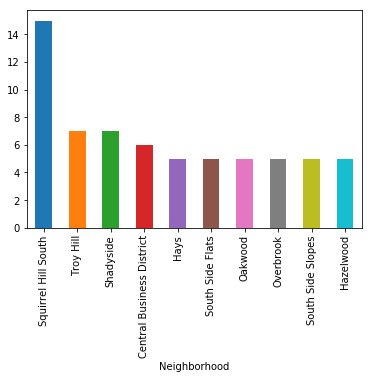

In [30]:
bridge_data.head(10).plot.bar();

## Finally, we calculated the Best neighborhood using our Data

### We did this by applying our metric:
Our metric was ranking each neighbor in three different categories which included: least amount of arrest, least amount of crime reports per 100 people, and most amount of bridges. We did this using the merged datasets of consisting of “bridge_data.csv,” “crime_data.csv,” and “public_safety_data.csv” to form “mergedDF.” Then, we created a column to hold the arrest rank of each neighborhood along with replacing all the NaN values with a 0. Next in the loop, it would go through each row in sorted mergedDf with respect to arrest reports and rank them in the arrestRanks column. Similarly, for crime rank, it is done in a similar fashion with replacing all the NaN values with 0 and then going through each row of sorted mergedDf with respect to crime reports and rank them in the crimeRanks column. However, ranking bridges was a bit different since we were looking for neighborhoods with the most while the other two were looking for neighborhoods for the least amount of crime and arrests. So we created a column for bridge rank then sorted it from most to least. Following that we go through each row in sorted mergedDf with respect to number of bridges and rank them in the bridgeRank column. After ranking the three things, we calculate the weighted score for each neighborhood and found the neighborhood who scored the least. To do this we used a loop to go through each row with an “if” statement that set the first row as starting values then an “else” to go through each row, see if it is lower than the current lowest, if it is, update values. At the end it would print out with neighborhood scored the least which means that is the best neighborhood in Pittsburgh. 

In [5]:
first = pd.concat([crime, bridges], axis=1, sort=False)
first.index.name = "Neighborhood"
mergedDf = first.merge(safety_df, left_index=True, right_on='Neighborhood')
mergedDf.set_index("Neighborhood", inplace = True)
mergedDf.sort_index(axis = 0)
#create a column for arrest ranks (relative to each other)
mergedDf['arrestRank'] = mergedDf['Number of Bridges:']

#replace all the NaN values with 0
mergedDf = mergedDf.replace(np.nan, 0)
rank = 1
realCounter = 0
previous = mergedDf.iloc[0]["Arrest Reports:"]
#go through each row in sorted mergedDf with respect to arrest reports and rank them in the arrestRanks column
for index,row in mergedDf.iterrows():
    #if the previous row is less than current one, increment rank
    if(previous < mergedDf.iloc[realCounter]["Arrest Reports:"]):
        previous = mergedDf.iloc[realCounter]["Arrest Reports:"]
        rank += 1
    else:
        pass
    mergedDf.loc[index, "arrestRank"] = rank
    realCounter += 1
    
#create a column for bridge rank
mergedDf['bridgesRank'] = mergedDf['Number of Bridges:']
mergedDf = mergedDf.replace(np.nan, 0)
#sort from most to least
mergedDf = mergedDf.sort_values(by=['Number of Bridges:'], ascending=False)
rank = 1
realCounter = 0
previous = mergedDf.iloc[0]["Number of Bridges:"]
#does the same as previous for loop for arrest ranks
for index,row in mergedDf.iterrows():
    #this has a > instead of < bc we r starting from highest vals, not lowest
    if(previous > mergedDf.iloc[realCounter]["Number of Bridges:"]):
        previous = mergedDf.iloc[realCounter]["Number of Bridges:"]
        rank += 1
    else:
        pass
    mergedDf.loc[index, "bridgesRank"] = rank
    realCounter += 1

#everything for crime rank is the same as arrest rank
mergedDf['crimeRank'] = mergedDf['Part 1 Crime per 100 Persons (2010)']
mergedDf = mergedDf.replace(np.nan, 0)
mergedDf = mergedDf.sort_values(by=['Part 1 Crime per 100 Persons (2010)'], ascending=True)
rank = 1
realCounter = 0
previous = mergedDf.iloc[0]["Part 1 Crime per 100 Persons (2010)"]
#same stuff as arrest
for index,row in mergedDf.iterrows():
    
    if(previous < mergedDf.iloc[realCounter]["Part 1 Crime per 100 Persons (2010)"]):
        previous = mergedDf.iloc[realCounter]["Part 1 Crime per 100 Persons (2010)"]
        rank += 1
    else:
        pass
    mergedDf.loc[index, "crimeRank"] = rank
    realCounter += 1

total = 0
minNeigh = ""
counter = 0
#calculate the weighted score for each neighborhood and find the min
for index,row in mergedDf.iterrows():
    if(counter == 0):
        #set first row as "starting" values
        total = int(mergedDf.iloc[counter]["arrestRank"])*15+int(mergedDf.iloc[counter]["bridgesRank"])*70+int(mergedDf.iloc[counter]["crimeRank"])*15
        minNeigh = index
    else:
        #go through each row, see if it is lower than the current lowest, if it is, update vals
        compare = int(mergedDf.iloc[counter]["arrestRank"])*15+int(mergedDf.iloc[counter]["bridgesRank"])*70+int(mergedDf.iloc[counter]["crimeRank"])*15
        if(compare < total):
            total = compare
            minNeigh = index
    counter += 1
print(minNeigh,"with a lowest score of", total, "is the best neighbhorhood in Pittsburgh")
mergedDf
#with current weights, cities with most bridges and least arrests and crime per 100 persons are valued
#if you change how much the having bridges matter it becomes oakwood otherwise it is new homestead.

Oakwood with a lowest score of 490 is the best neighbhorhood in Pittsburgh


,Arrest Reports:,Number of Bridges:,Part 1 Crime per 100 Persons (2010),arrestRank,bridgesRank,crimeRank
Neighborhood,,,,,,
Fairywood,62,0.0,0.3,11.0,9.0,1.0
New Homestead,22,0.0,0.7,4.0,9.0,2.0
Lincoln Place,101,0.0,1.0,16.0,9.0,3.0
Summer Hill,45,0.0,1.2,9.0,9.0,4.0
Squirrel Hill North,151,1.0,1.3,29.0,8.0,5.0
Glen Hazel,69,0.0,1.4,12.0,9.0,6.0
Oakwood,44,5.0,1.4,8.0,4.0,6.0
Banksville,141,1.0,1.5,27.0,8.0,7.0
Stanton Heights,115,0.0,1.5,22.0,9.0,7.0


## The Best Neighborhood in Pittsburgh is... OAKWOOD
### Oakwood ranked:
* 6th for least arrests per year
* 14th for best public safety, based off of crime reports per person
* 4th for most bridges (tie)
  
This neighborhood was the only one that was in the top 20 of each of our categories. We decided 

### Before the Metric Was Applied:
Without the metric, Oakwood still ranks top 10. The visual below represents the sum of arrest reports, number of bridges, and major crime reports per 100 persons. 

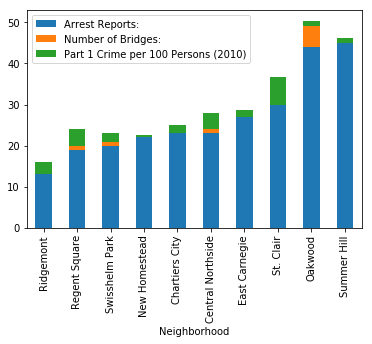

In [7]:
first = pd.concat([crime, bridges], axis=1, sort=False)
first.index.name = "Neighborhood"
merged = first.merge(safety_df, left_index=True, right_on='Neighborhood')
merged.set_index("Neighborhood", inplace = True)
mergeddd = merged.sort_values('Arrest Reports:', ascending=True)
mergeddd.head(10).plot.bar(stacked=True);

We believe that bridges are the most vital part to the ranking of the best neighborhood. Bridges are a unique characteristic of Pittsburgh and help build a sense of community throughout. Thus, we weighted bridges heavier than both safety and crime, but still took these into account as they are clearly necessary to how great a neighborhood is. Once they were weighted **Oakwood won by with the least points**.

## Our Conclusions

* **Jerry**: Before doing this project I thought that the Central Business District would be the best neighborhood since always seems to be filled with activities like hockey games and concerts. Additionally, I have to go through Central Business District every day to get here to Pitt and from my drive here I can see lots of bridges and a few police cars. I thought that having a few police cars was a good thing which indicates low crime but it turns out to be quite the opposite. I was shocked that Oakwood turned out to the best neighborhood as I have never heard of that neighborhood before and have grown up here my entire life. Also, this means that the Central Business District is not as safe I thought and perhaps need not walk aimlessly in the dark anymore. 

* **Hailey**: Before we began, I thought Shadyside would be the best because it is my personal favorite. I’m not a Pittsburgh native, but every time I visited my sister here we would always go out to eat and shop in Shadyside. Now, I bring my parents there when they visit. I know it has a good number of bridges and I think bridges are one of the greatest characteristics of Pittsburgh. I have never thought of it as a dangerous area and I know there are a decent number of bridges there. I was surprised to find out Oakwood was the best, as its an area I have never been before. It is one of the safest areas and it ranks as one of the top for number of bridges.   

* **Evan**: My favorite neighborhoods in Pittsburgh are Squirrel Hill and Oakland. Since I live in Oakland while at Pitt, I am always finding fun activities in the area. In addition I like having many medical and educational buildings in Oakland. I also really like Squirrel Hill because there are a lot of great dining options and many different retail stores. I was a bit surprised at first to learn Oakwood was the best according to our calculations. However, it made sense since Oakwood has so many bridges. Also, I have not been to Oakwood so I can not personally say if I like it or not. After seeing how highly Oakwood ranked in our metrics, I will be visiting Oakwood soon to see if it really is the best neighborhood in Pittsburgh.


![Pittsburgh](https://media.giphy.com/media/8L0xGLf9zm3f4TynX2/giphy.gif)